### Dia 1 - Importação de dados

In [44]:
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Coletando dados

In [2]:
# Link do repositório e caminho para os arquivos CSV
endereco = "https://github.com/FranciscoFoz/7_Days_of_Code_Alura-Python-Pandas/tree/48684f508c0c9ad1d51975c72091b160dee66db4/Dia_1-Importando_dados/Datasets/dados_emprestimos"

# Extrair partes do link
partes = endereco.split("/")
usuario = partes[3]
repositorio = partes[4]
ramo = partes[6]
caminho_pasta = "/".join(partes[7:])

# Montar URL da API
url_api = f"https://api.github.com/repos/{usuario}/{repositorio}/contents/{caminho_pasta}?ref={ramo}"

# Fazer requisição
resposta = requests.get(url_api)

# Lista para armazenar os DataFrames
lista_dfs = []

if resposta.status_code == 200:
    arquivos = resposta.json()
    for arquivo in arquivos:
        if arquivo['name'].endswith('.csv'):
            url_raw = arquivo['download_url']
            df = pd.read_csv(url_raw)
            lista_dfs.append(df)

Concatenando os DataFrames

In [3]:
# Concatenar todos os DataFrames

emprestimos_biblioteca = pd.concat(lista_dfs, ignore_index=True)

# Exibir os primeiros dados
emprestimos_biblioteca

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario
0,709684,L095049,NaN,2010/01/04 07:44:10.721000000,2010/01/05 16:26:12.662000000,2.008023e+09,ALUNO DE GRADUAÇÃO
1,709685,L167050,NaN,2010/01/04 07:44:10.750000000,2010/01/12 07:34:13.934000000,2.008023e+09,ALUNO DE GRADUAÇÃO
2,709686,2006017618,2010/01/26 08:07:01.738000000,2010/01/04 08:08:44.081000000,2010/02/25 07:36:25.800000000,2.008112e+09,ALUNO DE PÓS-GRADUAÇÃO
3,709687,L184117,2010/01/18 11:07:46.470000000,2010/01/04 08:24:21.284000000,2010/02/03 08:58:45.692000000,2.007211e+08,ALUNO DE GRADUAÇÃO
4,709684,L095049,NaN,2010/01/04 07:44:10.721000000,2010/01/05 16:26:12.662000000,2.008023e+09,ALUNO DE GRADUAÇÃO
...,...,...,...,...,...,...,...
2258013,2989086,2008047044,NaN,2020/05/05 19:51:06.059000000,2021/05/13 14:53:31.000000000,3.067431e+06,SERVIDOR TÉCNICO-ADMINISTRATIVO
2258014,2989087,2008047047,NaN,2020/05/05 19:51:06.135000000,2021/05/13 14:53:38.000000000,3.067431e+06,SERVIDOR TÉCNICO-ADMINISTRATIVO
2258015,2989088,2010052905,NaN,2020/05/05 19:51:06.164000000,2021/05/13 15:01:46.000000000,3.067431e+06,SERVIDOR TÉCNICO-ADMINISTRATIVO
2258016,2989089,2010048023,NaN,2020/06/09 11:54:02.669000000,2021/07/21 15:33:55.000000000,2.020101e+10,ALUNO DE PÓS-GRADUAÇÃO


Verificando duplicatas

In [4]:
emprestimos_biblioteca.value_counts()

id_emprestimo  codigo_barras  data_renovacao                 data_emprestimo                data_devolucao                 matricula_ou_siape  tipo_vinculo_usuario  
709704         2006021442     2010/01/17 18:56:43.923000000  2010/01/04 09:58:46.522000000  2010/02/01 13:59:02.528000000  2.008010e+09        ALUNO DE GRADUAÇÃO        7
709705         2009032168     2010/01/17 18:56:43.909000000  2010/01/04 09:58:46.549000000  2010/01/20 13:14:34.464000000  2.008010e+09        ALUNO DE GRADUAÇÃO        7
709698         2009047725     2010/01/18 14:44:41.163000000  2010/01/04 09:21:19.099000000  2010/02/02 12:02:38.444000000  2.009047e+09        ALUNO DE GRADUAÇÃO        3
709686         2006017618     2010/01/26 08:07:01.738000000  2010/01/04 08:08:44.081000000  2010/02/25 07:36:25.800000000  2.008112e+09        ALUNO DE PÓS-GRADUAÇÃO    2
2461099        2012008348     2016/06/27 20:35:46.855000000  2016/06/14 11:20:33.254000000  2016/07/11 14:37:29.000000000  2.015022e+09        ALUNO D

Excluindo duplicatas

In [5]:
emprestimos_biblioteca.duplicated().sum()  # Verificando duplicatas

37

In [6]:
emprestimos_biblioteca.drop_duplicates(inplace=True)  # Removendo duplicatas

In [7]:
emprestimos_biblioteca.value_counts()

id_emprestimo  codigo_barras  data_renovacao                 data_emprestimo                data_devolucao                 matricula_ou_siape  tipo_vinculo_usuario  
709686         2006017618     2010/01/26 08:07:01.738000000  2010/01/04 08:08:44.081000000  2010/02/25 07:36:25.800000000  2.008112e+09        ALUNO DE PÓS-GRADUAÇÃO    1
2336122        2011033079     2016/11/21 02:01:58.488000000  2016/11/10 17:00:12.989000000  2016/12/02 14:21:49.000000000  2.016023e+09        ALUNO DE GRADUAÇÃO        1
2336103        2014085936     2016/11/25 19:25:36.215000000  2016/11/10 16:54:52.447000000  2016/12/13 14:30:52.000000000  2.014047e+09        ALUNO DE GRADUAÇÃO        1
2336104        2011027960     2016/11/23 17:27:54.642000000  2016/11/10 16:55:17.956000000  2016/11/28 10:32:38.000000000  2.016083e+09        ALUNO DE GRADUAÇÃO        1
2336105        2014000897     2016/12/02 15:02:53.356000000  2016/11/10 16:55:19.851000000  2016/12/23 13:53:23.000000000  2.014071e+09        ALUNO D

In [8]:
emprestimos_biblioteca.head()  # Exibir as primeiras linhas do DataFrame

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario
0,709684,L095049,NaN,2010/01/04 07:44:10.721000000,2010/01/05 16:26:12.662000000,2.008023e+09,ALUNO DE GRADUAÇÃO
1,709685,L167050,NaN,2010/01/04 07:44:10.750000000,2010/01/12 07:34:13.934000000,2.008023e+09,ALUNO DE GRADUAÇÃO
2,709686,2006017618,2010/01/26 08:07:01.738000000,2010/01/04 08:08:44.081000000,2010/02/25 07:36:25.800000000,2.008112e+09,ALUNO DE PÓS-GRADUAÇÃO
3,709687,L184117,2010/01/18 11:07:46.470000000,2010/01/04 08:24:21.284000000,2010/02/03 08:58:45.692000000,2.007211e+08,ALUNO DE GRADUAÇÃO
8,709688,2007027500,2010/01/19 15:59:26.464000000,2010/01/04 08:27:33.569000000,2010/02/03 13:06:30.662000000,2.009046e+09,ALUNO DE GRADUAÇÃO


Importando mais dados (arquivo parquet)

In [9]:
dados_exemplares = pd.read_parquet('https://github.com/FranciscoFoz/7_Days_of_Code_Alura-Python-Pandas/raw/main/Dia_1-Importando_dados/Datasets/dados_exemplares.parquet')
dados_exemplares

,id_exemplar,codigo_barras,colecao,biblioteca,status_material,localizacao,registro_sistema
index,,,,,,,
0,5,L000003,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,694,1
1,4,L000002,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,688,1
2,3,L000001,Acervo Circulante,Biblioteca Central Zila Mamede,ESPECIAL,638,1
3,7,L000114,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,616,5
5,10,L000041,Acervo Circulante,Biblioteca Central Zila Mamede,ESPECIAL,657,15
...,...,...,...,...,...,...,...
568580,1353472,2021011150,Acervo Circulante,Biblioteca Setorial do Núcleo de Educação da I...,REGULAR,951,268231
568581,1353473,2019013454,Acervo Circulante,Biblioteca Central Zila Mamede,ESPECIAL,997,268233
568582,1353474,2019012811,Acervo Circulante,Biblioteca Central Zila Mamede,ESPECIAL,987,268234


Unindo os DataFrames

In [10]:
emprestimos_completo = emprestimos_biblioteca.merge(dados_exemplares)
emprestimos_completo

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao,registro_sistema
0,709684,L095049,NaN,2010/01/04 07:44:10.721000000,2010/01/05 16:26:12.662000000,2.008023e+09,ALUNO DE GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630,4225
1,726965,L095049,2010/03/31 12:41:08.684000000,2010/03/01 12:40:56.212000000,2010/04/30 14:42:35.366000000,2.009122e+09,ALUNO DE PÓS-GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630,4225
2,709685,L167050,NaN,2010/01/04 07:44:10.750000000,2010/01/12 07:34:13.934000000,2.008023e+09,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,25009
3,717763,L167050,NaN,2010/02/11 11:16:30.335000000,2010/03/04 08:54:32.262000000,2.008050e+09,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,25009
4,729996,L167050,2010/03/17 09:08:26.874000000,2010/03/04 13:36:26.599000000,2010/03/31 18:04:29.669000000,2.007226e+08,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,25009
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2072517,2989018,2009036492,NaN,2020/03/17 19:49:10.187000000,2020/12/03 08:12:20.000000000,2.015011e+10,ALUNO DE GRADUAÇÃO,274820,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,676,120845
2072518,2989020,2014062640,NaN,2020/03/17 19:51:15.700000000,2021/01/07 11:16:28.000000000,2.019004e+10,ALUNO DE GRADUAÇÃO,1157915,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,228,213248
2072519,2989032,2018003324,NaN,2020/03/17 20:00:11.416000000,2021/08/30 13:29:44.000000000,2.019102e+10,ALUNO DE PÓS-GRADUAÇÃO,1317173,Acervo Circulante,Biblioteca Setorial da Faculdade de Ciências d...,REGULAR,784,255835
2072520,2989049,2006024313,NaN,2020/03/17 20:47:18.741000000,NaN,2.015013e+10,ALUNO DE GRADUAÇÃO,206073,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,663,82178


### Dia 2 - As primeiras manipulações

In [11]:
emprestimos_completo.head()  # Exibir as primeiras linhas do DataFrame completo

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao,registro_sistema
0,709684,L095049,NaN,2010/01/04 07:44:10.721000000,2010/01/05 16:26:12.662000000,2.008023e+09,ALUNO DE GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630,4225
1,726965,L095049,2010/03/31 12:41:08.684000000,2010/03/01 12:40:56.212000000,2010/04/30 14:42:35.366000000,2.009122e+09,ALUNO DE PÓS-GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630,4225
2,709685,L167050,NaN,2010/01/04 07:44:10.750000000,2010/01/12 07:34:13.934000000,2.008023e+09,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,25009
3,717763,L167050,NaN,2010/02/11 11:16:30.335000000,2010/03/04 08:54:32.262000000,2.008050e+09,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,25009
4,729996,L167050,2010/03/17 09:08:26.874000000,2010/03/04 13:36:26.599000000,2010/03/31 18:04:29.669000000,2.007226e+08,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,25009


Atribuir a coluna com nomenclatura da CDU

In [12]:
CDU_lista = []
for CDU in emprestimos_completo['localizacao']:
    if(CDU < 100):
        CDU_lista.append('Generalidades')
    elif(CDU < 200):
        CDU_lista.append('Filosofia e Psicologia')
    elif(CDU < 300):
        CDU_lista.append('Religião')
    elif(CDU < 400):
        CDU_lista.append('Ciências Sociais')
    elif(CDU < 500):
        CDU_lista.append('Classe vaga')
    elif(CDU < 600):
        CDU_lista.append('Matemática e ciências naturais')
    elif(CDU < 700):
        CDU_lista.append('Ciências aplicadas')
    elif(CDU < 800):
        CDU_lista.append('ABelas artes')
    elif(CDU < 900):
        CDU_lista.append('Linguagem. Língua. Linguística')
    else:
        CDU_lista.append('Geografia. Biografia. História')

emprestimos_completo['CDU_geral'] = CDU_lista

In [13]:
emprestimos_completo.head()

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao,registro_sistema,CDU_geral
0,709684,L095049,NaN,2010/01/04 07:44:10.721000000,2010/01/05 16:26:12.662000000,2.008023e+09,ALUNO DE GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630,4225,Ciências aplicadas
1,726965,L095049,2010/03/31 12:41:08.684000000,2010/03/01 12:40:56.212000000,2010/04/30 14:42:35.366000000,2.009122e+09,ALUNO DE PÓS-GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630,4225,Ciências aplicadas
2,709685,L167050,NaN,2010/01/04 07:44:10.750000000,2010/01/12 07:34:13.934000000,2.008023e+09,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,25009,Ciências aplicadas
3,717763,L167050,NaN,2010/02/11 11:16:30.335000000,2010/03/04 08:54:32.262000000,2.008050e+09,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,25009,Ciências aplicadas
4,729996,L167050,2010/03/17 09:08:26.874000000,2010/03/04 13:36:26.599000000,2010/03/31 18:04:29.669000000,2.007226e+08,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,25009,Ciências aplicadas


Excluir a coluna "registro_sistema"

In [14]:
emprestimos_completo.drop(columns=['registro_sistema'], inplace=True)  # Excluir a coluna "registro_sistema"

Modificar o tipo de dado da matrícula

In [ ]:
emprestimos_completo['matricula_ou_siape'] = emprestimos_completo['matricula_ou_siape'].astype(str)  # Modificar o tipo de dado da matrícula

### Dia 3 - Análise exploratória de dados e DateTime

In [17]:
emprestimos_completo.head()  # Exibir as primeiras linhas do DataFrame completo

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao,CDU_geral
0,709684,L095049,NaN,2010/01/04 07:44:10.721000000,2010/01/05 16:26:12.662000000,2008023265.0,ALUNO DE GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630,Ciências aplicadas
1,726965,L095049,2010/03/31 12:41:08.684000000,2010/03/01 12:40:56.212000000,2010/04/30 14:42:35.366000000,2009121584.0,ALUNO DE PÓS-GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630,Ciências aplicadas
2,709685,L167050,NaN,2010/01/04 07:44:10.750000000,2010/01/12 07:34:13.934000000,2008023265.0,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,Ciências aplicadas
3,717763,L167050,NaN,2010/02/11 11:16:30.335000000,2010/03/04 08:54:32.262000000,2008050352.0,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,Ciências aplicadas
4,729996,L167050,2010/03/17 09:08:26.874000000,2010/03/04 13:36:26.599000000,2010/03/31 18:04:29.669000000,200722565.0,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,Ciências aplicadas


A quantidade de empréstimos está diminuindo, aumentando ou permanecendo igual ao decorrer dos últimos anos?

In [18]:
emprestimos_completo['id_emprestimo'].value_counts()

id_emprestimo
2010326     3
2014596     3
10240112    3
2422542     3
9690168     3
           ..
2767562     1
2317930     1
2283256     1
2262867     1
2989061     1
Name: count, Length: 2068724, dtype: int64

Quantos empréstimos foram realizados ao total?

In [19]:
emprestimos = len(emprestimos_completo['id_emprestimo'].drop_duplicates())
emprestimos

2068724

Quantos exemplares foram emprestados ao total ?

In [20]:
exemplares = len(emprestimos_completo)
exemplares

2072522

Quantidade de exemplares emprestados por ano

In [21]:
emprestimos_por_ano = pd.DataFrame(emprestimos_completo['data_emprestimo'].value_counts().reset_index())
emprestimos_por_ano.columns = ['data', 'quantidade']
emprestimos_por_ano['data'] = pd.to_datetime(emprestimos_por_ano['data'])
emprestimos_por_ano

,data,quantidade
0,2017-04-20 21:07:44.036,3
1,2014-05-12 09:56:18.787,3
2,2015-05-05 20:37:19.551,3
3,2018-02-22 10:45:11.523,3
4,2014-01-28 14:49:50.505,3
...,...,...
2068686,2012-04-11 10:12:20.960,1
2068687,2010-11-12 11:03:22.117,1
2068688,2015-09-15 14:26:08.838,1
2068689,2015-08-14 13:41:47.472,1


In [22]:
emprestimos_por_ano['ano'] = emprestimos_por_ano['data'].dt.year
emprestimos_agrupados_ano = emprestimos_por_ano.groupby('ano')['quantidade'].sum().reset_index()
emprestimos_agrupados_ano

,ano,quantidade
0,2010,161394
1,2011,196390
2,2012,221365
3,2013,234749
4,2014,219189
5,2015,213582
6,2016,215900
7,2017,218462
8,2018,194080
9,2019,171801


Grafico da quantidade total de exemplares emprestados por cada ano

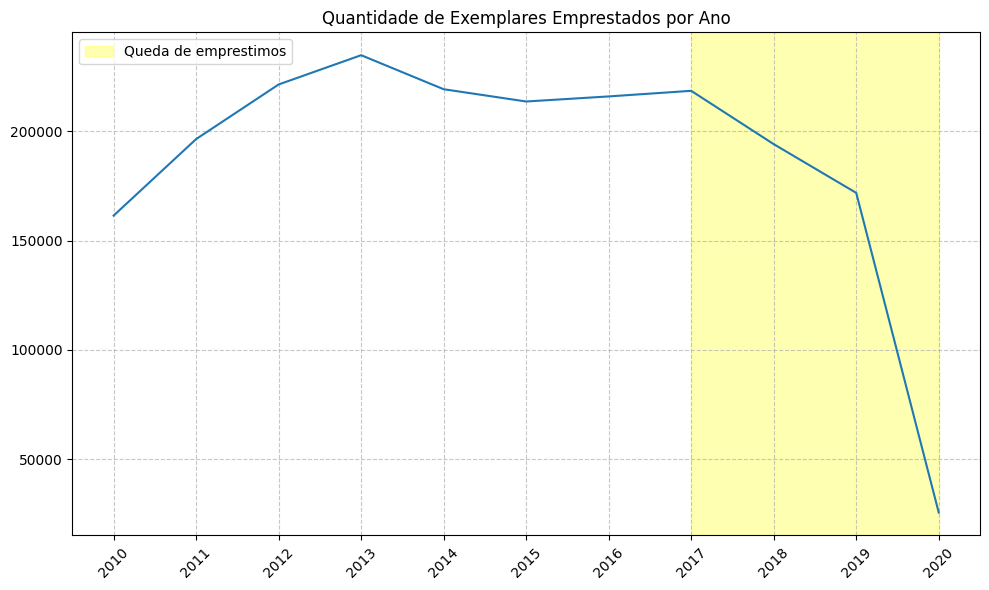

In [23]:
plt.figure(figsize=(10, 6))
ax = sns.lineplot(data=emprestimos_agrupados_ano, x='ano', y='quantidade')
ax.set(xlabel=None, ylabel=None)
plt.title('Quantidade de Exemplares Emprestados por Ano')

# Destaque da região de 2017 a 2020
plt.axvspan(2017, 2020, color='yellow', alpha=0.3, label='Queda de emprestimos')
plt.legend()

plt.xticks(emprestimos_agrupados_ano['ano'], rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Houve uma queda no número de exemplares à partir de 2013, ficando mais perceptivel de 2017 até 2020.

2020 ficou muito menor, provavelmente devido a pandemia (apenas 25610 exemplares emprestados).

Quantos foram por cada mês?

In [24]:
emprestimos_por_ano['mes'] = emprestimos_por_ano['data'].dt.month
emprestimos_por_mes = emprestimos_por_ano.groupby('mes')['quantidade'].sum().reset_index()
emprestimos_por_mes.set_index('mes', inplace=True)
emprestimos_por_mes

,quantidade
mes,
1,67514
2,210200
3,252185
4,208725
5,202530
6,138123
7,123790
8,232793
9,208234


Modificando os números por nomes dos meses

In [25]:
dicionario_meses = {
    1: 'Jan', 2: 'Fev', 3: 'Mar',
    4: 'Abr', 5: 'Mai', 6: 'Jun',
    7: 'Jul', 8: 'Ago', 9: 'Set',
    10: 'Out', 11: 'Nov', 12: 'Dez'}

In [26]:
emprestimos_por_mes.index = emprestimos_por_mes.index.map(dicionario_meses)
emprestimos_por_mes

,quantidade
mes,
Jan,67514
Fev,210200
Mar,252185
Abr,208725
Mai,202530
Jun,138123
Jul,123790
Ago,232793
Set,208234


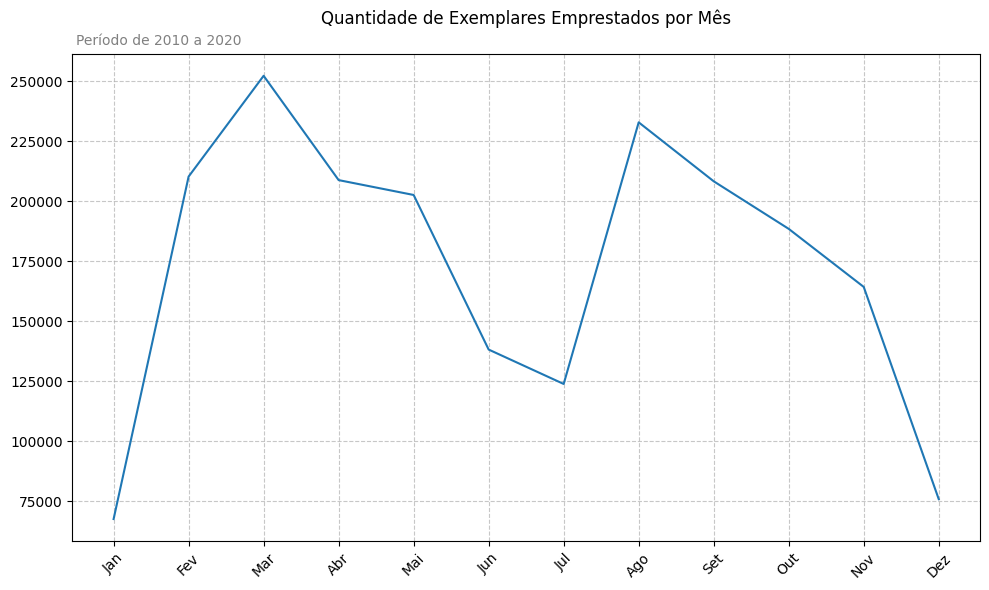

In [27]:
plt.figure(figsize=(10, 6))
ax = sns.lineplot(data=emprestimos_por_mes, x=emprestimos_por_mes.index, y='quantidade')
ax.set(xlabel=None, ylabel=None)
plt.title('Quantidade de Exemplares Emprestados por Mês'+'\n')
ax.text(s='Período de 2010 a 2020',x=-0.5,y=265000,fontsize=10, ha='left',color='gray')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Os meses com maiores números de exemplares emprestados foram em março e agosto.

Janeiro, julho e dezembro são os menores números, provavelmente por ser meses de férias.

Qual é a quantidade de empréstimos por hora ao longo do dia ?

In [28]:
emprestimos_por_ano.data

0         2017-04-20 21:07:44.036
1         2014-05-12 09:56:18.787
2         2015-05-05 20:37:19.551
3         2018-02-22 10:45:11.523
4         2014-01-28 14:49:50.505
                    ...          
2068686   2012-04-11 10:12:20.960
2068687   2010-11-12 11:03:22.117
2068688   2015-09-15 14:26:08.838
2068689   2015-08-14 13:41:47.472
2068690   2020-03-17 21:22:22.138
Name: data, Length: 2068691, dtype: datetime64[ns]

In [29]:
emprestimos_por_hora = emprestimos_por_ano.groupby(emprestimos_por_ano['data'].dt.hour)['quantidade'].sum()
emprestimos_por_hora.index.name = 'horas'
emprestimos_por_hora = emprestimos_por_hora.reset_index()
emprestimos_por_hora

,horas,quantidade
0,0,17
1,6,14
2,7,18777
3,8,103416
4,9,131273
5,10,185839
6,11,180048
7,12,148754
8,13,126987
9,14,150876


In [30]:
emprestimos_por_hora = emprestimos_por_hora.sort_values(ascending=True, by='quantidade')

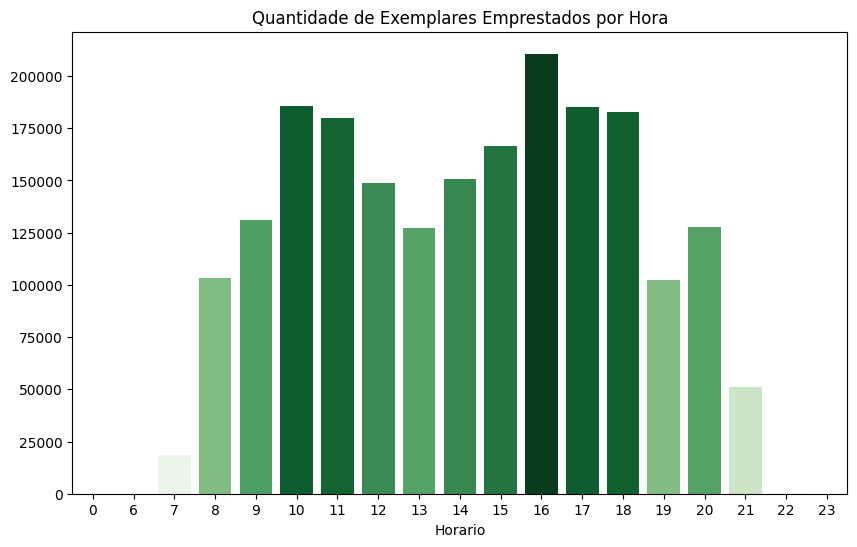

In [31]:
plt.figure(figsize=(10, 6))

ax = sns.barplot(data=emprestimos_por_hora, x='horas', y='quantidade', palette='Greens', hue='quantidade', dodge=False)

plt.legend([], [], frameon=False)

ax.set(xlabel='Horario', ylabel=None)
ax.set_title('Quantidade de Exemplares Emprestados por Hora')

ax=ax

Os picos de atendimento para empréstimos são às 10hs e 16hs.

### Dia 4 - Análise de dados - Variáveis categóricas

In [32]:
emprestimos_completo.head()

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao,CDU_geral
0,709684,L095049,NaN,2010/01/04 07:44:10.721000000,2010/01/05 16:26:12.662000000,2008023265.0,ALUNO DE GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630,Ciências aplicadas
1,726965,L095049,2010/03/31 12:41:08.684000000,2010/03/01 12:40:56.212000000,2010/04/30 14:42:35.366000000,2009121584.0,ALUNO DE PÓS-GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630,Ciências aplicadas
2,709685,L167050,NaN,2010/01/04 07:44:10.750000000,2010/01/12 07:34:13.934000000,2008023265.0,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,Ciências aplicadas
3,717763,L167050,NaN,2010/02/11 11:16:30.335000000,2010/03/04 08:54:32.262000000,2008050352.0,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,Ciências aplicadas
4,729996,L167050,2010/03/17 09:08:26.874000000,2010/03/04 13:36:26.599000000,2010/03/31 18:04:29.669000000,200722565.0,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,Ciências aplicadas


Ajustar datas de empréstimo

In [33]:
emprestimos_completo['data_emprestimo'] = pd.to_datetime(emprestimos_completo['data_emprestimo'])

Verificando valores unicos no DataFrame

In [34]:
emprestimos_completo.tipo_vinculo_usuario.unique()

array(['ALUNO DE GRADUAÇÃO', 'ALUNO DE PÓS-GRADUAÇÃO', 'DOCENTE',
       'DOCENTE EXTERNO', 'SERVIDOR TÉCNICO-ADMINISTRATIVO',
       'ALUNO MÉDIO/TÉCNICO', 'USUÁRIO EXTERNO', 'OUTROS'], dtype=object)

In [35]:
emprestimos_completo.colecao.unique()

array(['Acervo Circulante', 'Folhetos', 'Teses', 'Dissertações',
       'Monografias', 'Publicações de Autores do RN',
       'Publicações da UFRN', 'Multimeios', 'Coleção Mossoroense',
       'Eventos', 'Trabalho Acadêmico', 'Obras de Referência',
       'Obras Raras', 'Literatura de Cordel', 'Coleção Zila Mamede',
       'Necessidades Educacionais Específicas'], dtype=object)

In [36]:
emprestimos_completo.biblioteca.unique()

array(['Biblioteca Central Zila Mamede',
       'Biblioteca Setorial Prof. Rodolfo Helinski - Escola Agrícola de Jundiaí - EAJ  - Macaiba',
       'Biblioteca Setorial Bertha Cruz Enders - \xadEscola de Saúde da UFRN - ESUFRN',
       'Biblioteca Setorial do Centro Ciências da Saúde - CCS',
       'Biblioteca Setorial Prof. Alberto Moreira Campos - \xadDepartamento de Odontologia',
       'Biblioteca Setorial Prof. Ronaldo Xavier de Arruda - CCET',
       'Biblioteca Setorial do Centro de Ciências Humanas, Letras e Artes - CCHLA',
       'Biblioteca Setorial Prof. Horácio Nicolas Solimo - \xad Engenharia Química - EQ - CT',
       'Biblioteca Setorial Prof. Francisco Gurgel De Azevedo - Instituto Química - IQ',
       'Biblioteca Setorial do Centro Ciências Sociais Aplicadas - CCSA',
       'Biblioteca Setorial do Departamento de Artes - DEART',
       'Biblioteca Setorial Prof. Dr. Marcelo Bezerra de Melo Tinôco - DARQ - \xadCT',
       'Biblioteca Setorial Árvore do Conhecimento - In

In [37]:
emprestimos_completo.CDU_geral.unique()

array(['Ciências aplicadas', 'Linguagem. Língua. Linguística',
       'Ciências Sociais', 'Geografia. Biografia. História',
       'Matemática e ciências naturais', 'Religião', 'Generalidades',
       'Filosofia e Psicologia', 'ABelas artes'], dtype=object)

In [38]:
# Contar a quantidade de empréstimos por tipo de vínculo do usuário
emprestimos_por_vinculo = emprestimos_completo['tipo_vinculo_usuario'].value_counts()

# Exibir o resultado
emprestimos_por_vinculo

tipo_vinculo_usuario
ALUNO DE GRADUAÇÃO                 1612324
ALUNO DE PÓS-GRADUAÇÃO              302541
DOCENTE                              70981
SERVIDOR TÉCNICO-ADMINISTRATIVO      32184
ALUNO MÉDIO/TÉCNICO                  28029
DOCENTE EXTERNO                      23949
USUÁRIO EXTERNO                       2509
OUTROS                                   5
Name: count, dtype: int64

Função que gera uma tabela de frequência e com o percentual para cada variável

In [39]:
def tabela_frequencia_percentual(df, coluna):
    frequencia = df[coluna].value_counts()
    percentual = df[coluna].value_counts(normalize=True) * 100
    tabela = pd.DataFrame({'Frequência': frequencia, 'Percentual (%)': percentual})
    tabela = round(tabela, 1)
    return tabela

In [40]:
# Vinculo do usuário
dados_usuario = tabela_frequencia_percentual(emprestimos_completo, 'tipo_vinculo_usuario')
dados_usuario

,Frequência,Percentual (%)
tipo_vinculo_usuario,,
ALUNO DE GRADUAÇÃO,1612324,77.8
ALUNO DE PÓS-GRADUAÇÃO,302541,14.6
DOCENTE,70981,3.4
SERVIDOR TÉCNICO-ADMINISTRATIVO,32184,1.6
ALUNO MÉDIO/TÉCNICO,28029,1.4
DOCENTE EXTERNO,23949,1.2
USUÁRIO EXTERNO,2509,0.1
OUTROS,5,0.0


Alunos de graduação com aproxidamente 78% é o maior grupo
O segundo maior grupo é o de pós graduação com aproximadamente 15%.

In [41]:
# Frequencia por coleção
dados_colecao = tabela_frequencia_percentual(emprestimos_completo, 'colecao')
dados_colecao

,Frequência,Percentual (%)
colecao,,
Acervo Circulante,2053120,99.1
Multimeios,7954,0.4
Monografias,4021,0.2
Dissertações,2406,0.1
Obras de Referência,1954,0.1
Publicações de Autores do RN,866,0.0
Publicações da UFRN,764,0.0
Teses,714,0.0
Folhetos,271,0.0


Acervo circulante é a principal coleção, com 99% da frequencia
É importante verificar os outros documentos, por que eles não estão sendo procurados com tanta frequencia

In [42]:
# Frequencia por biblioteca
dados_biblioteca = tabela_frequencia_percentual(emprestimos_completo, 'biblioteca')
dados_biblioteca

,Frequência,Percentual (%)
biblioteca,,
Biblioteca Central Zila Mamede,1426122,68.8
Biblioteca Setorial do Centro Ciências da Saúde - CCS,118614,5.7
Biblioteca Setorial da Faculdade de Ciências da Saúde do Trairi - FACISA - Santa Cruz,77609,3.7
Biblioteca Setorial Prof. Alberto Moreira Campos - ­Departamento de Odontologia,66447,3.2
Biblioteca Setorial Profª. Maria Lúcia da Costa Bezerra - ­CERES­ - Caicó,61478,3.0
Biblioteca Setorial Bertha Cruz Enders - ­Escola de Saúde da UFRN - ESUFRN,46040,2.2
"Biblioteca Setorial do Centro de Ciências Humanas, Letras e Artes - CCHLA",40744,2.0
Biblioteca Setorial Dr. Paulo Bezerra - EMCM/RN - Caicó,32097,1.5
Biblioteca Setorial Profª. Maria José Mamede Galvão - FELCS - Currais Novos,29089,1.4


Biblioteca Central Zila Mamede é provavelmente a maior biblioteca, por isso tem maiores números de emprestimos? Se não, porque as outras não conseguem a mesma frequencia?

In [43]:
# Frequencia de CDU geral
dados_cdu_geral = tabela_frequencia_percentual(emprestimos_completo, 'CDU_geral')
dados_cdu_geral

,Frequência,Percentual (%)
CDU_geral,,
Ciências aplicadas,1425473,68.8
Ciências Sociais,369536,17.8
Matemática e ciências naturais,68744,3.3
Generalidades,62521,3.0
Religião,62295,3.0
Filosofia e Psicologia,60563,2.9
Geografia. Biografia. História,7989,0.4
ABelas artes,7911,0.4
Linguagem. Língua. Linguística,7490,0.4


Existe uma diferença consideravel entre os tipos de temas.

Não só os temas de Ciências aplicadas, mas os de exatas em geral estão muito acima dos outros temas.

### Dia 5 - Analisando emprestimos e criando grafico Boxplot

- Verifique qual é a coleção com maior frequência para cada tipo de usuário.
- Filtre os dados com condições solicitadas
- Selecione apenas os empréstimos
- Faça a contagem de empréstimos mensais por cada ano
- Crie uma função para gerar a visualização do gráfico de box plot por cada ano.
- Crie o gráfico de boxplot

In [46]:
emprestimos_completo.head()

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao,CDU_geral
0,709684,L095049,NaN,2010-01-04 07:44:10.721,2010/01/05 16:26:12.662000000,2008023265.0,ALUNO DE GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630,Ciências aplicadas
1,726965,L095049,2010/03/31 12:41:08.684000000,2010-03-01 12:40:56.212,2010/04/30 14:42:35.366000000,2009121584.0,ALUNO DE PÓS-GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630,Ciências aplicadas
2,709685,L167050,NaN,2010-01-04 07:44:10.750,2010/01/12 07:34:13.934000000,2008023265.0,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,Ciências aplicadas
3,717763,L167050,NaN,2010-02-11 11:16:30.335,2010/03/04 08:54:32.262000000,2008050352.0,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,Ciências aplicadas
4,729996,L167050,2010/03/17 09:08:26.874000000,2010-03-04 13:36:26.599,2010/03/31 18:04:29.669000000,200722565.0,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,Ciências aplicadas


Alunos Graduação

In [ ]:
alunos_graduacao = emprestimos_completo[emprestimos_completo['tipo_vinculo_usuario'] == 'ALUNO DE GRADUAÇÃO'] # Filtrar apenas os alunos de graduação
alunos_graduacao.colecao.value_counts() # Contar a quantidade de empréstimos por coleção

colecao
Acervo Circulante                        1600155
Multimeios                                  4652
Monografias                                 3572
Dissertações                                1152
Obras de Referência                         1047
Publicações de Autores do RN                 595
Publicações da UFRN                          466
Teses                                        245
Folhetos                                     180
Trabalho Acadêmico                            81
Necessidades Educacionais Específicas         73
Eventos                                       57
Coleção Mossoroense                           17
Coleção Zila Mamede                           15
Literatura de Cordel                          11
Obras Raras                                    6
Name: count, dtype: int64

Tabela com quantidade mensal separado por ano

In [ ]:
alunos_graduacao_acervo_circulante = alunos_graduacao[alunos_graduacao['colecao'] == 'Acervo Circulante'] # Filtrar apenas o acervo circulante
alunos_graduacao_acervo_circulante = pd.DataFrame(alunos_graduacao_acervo_circulante) # Converter para DataFrame
alunos_graduacao_acervo_circulante['data_emprestimo'] = pd.to_datetime(alunos_graduacao_acervo_circulante['data_emprestimo']) # Converter a coluna 'data_emprestimo' para o tipo datetime
alunos_graduacao_acervo_circulante['ano'] = alunos_graduacao_acervo_circulante['data_emprestimo'].dt.year # Extrair o ano
alunos_graduacao_acervo_circulante['mes'] = alunos_graduacao_acervo_circulante['data_emprestimo'].dt.month # Extrair o mês
alunos_graduacao_acervo_circulante = alunos_graduacao_acervo_circulante.loc[:, ['ano', 'mes']] # Selecionar apenas as colunas 'ano' e 'mes'
alunos_graduacao_acervo_circulante = alunos_graduacao_acervo_circulante.value_counts().to_frame('quantidade').reset_index() # Contar a quantidade de empréstimos por ano e mês
alunos_graduacao_acervo_circulante

,ano,mes,quantidade
0,2012,3,22797
1,2015,3,22483
2,2013,4,21853
3,2017,3,21735
4,2016,3,21692
...,...,...,...
118,2016,1,2670
119,2019,1,2276
120,2019,12,1980
121,2020,1,1781


Criar função para Boxplot

In [186]:
def criar_boxplot(df, x_col, y_col, title, subtitle):
    """
    Cria um boxplot a partir de um DataFrame.
    
    :param df: DataFrame contendo os dados.
    :param x_col: Coluna do eixo x.
    :param y_col: Coluna do eixo y.
    :param title: Título do gráfico.
    :param subtitle: Subtítulo do gráfico (opcional).
    """
    
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))

    ax = sns.boxplot(data=df, x=x_col, y=y_col, color='Lightgreen')
    ax.set_title(title+"\n", fontsize=12, fontweight='bold')
    ax.text(s=subtitle,x=-0.5,y=max(df[y_col])*1.07,fontsize=10, ha='left', color='gray')
    ax.set_xlabel(None) # Ajusta o rótulo do eixo x
    ax.set_ylabel(None) # Ajusta o rótulo do eixo y
    plt.xticks(rotation=45) # Ajusta a rotação dos rótulos do eixo x, se necessário
    plt.grid(True, linestyle='--', alpha=0.7) # Ajusta o grid para melhor visualização
    plt.tight_layout() # Ajusta o layout para evitar sobreposição
    plt.show()

Criar boxplot para a quantidade de empréstimos por ano e mês para alunos de graduação

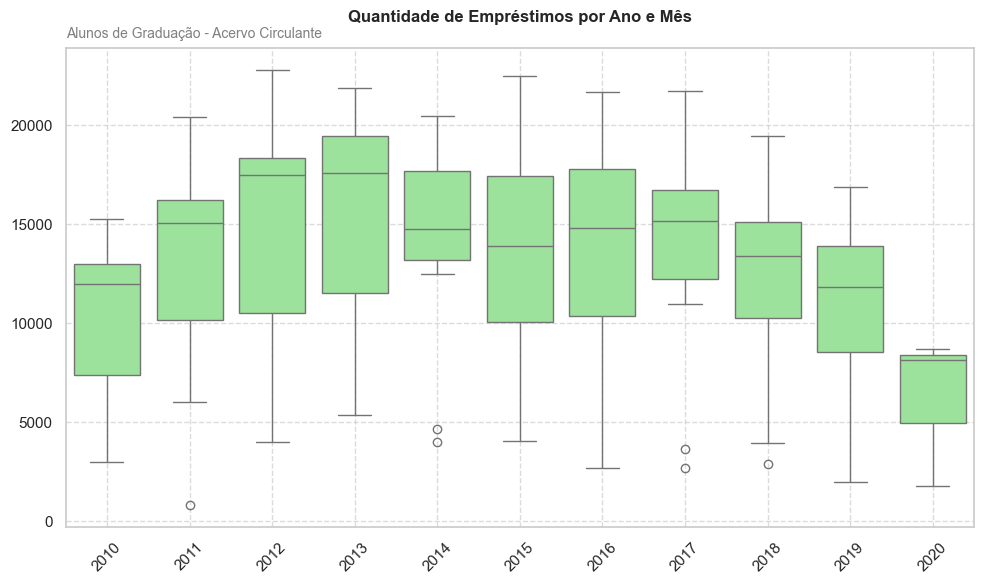

In [187]:
# Criar boxplot para a quantidade de empréstimos por ano e mês
criar_boxplot(alunos_graduacao_acervo_circulante, 'ano', 'quantidade', 'Quantidade de Empréstimos por Ano e Mês', 'Alunos de Graduação - Acervo Circulante')

Aqui é possível confirmar a queda de emprestimos a partir de 2013, com uma certa recuperação em 2016 e 2017.

Alunos Pós Graduação

In [188]:
alunos_pos_graduacao = emprestimos_completo[emprestimos_completo['tipo_vinculo_usuario'] == 'ALUNO DE PÓS-GRADUAÇÃO'] # Filtrar apenas os alunos de pós graduação
alunos_pos_graduacao.colecao.value_counts() # Contar a quantidade de empréstimos por coleção

colecao
Acervo Circulante                        299201
Dissertações                                934
Obras de Referência                         700
Multimeios                                  559
Teses                                       367
Monografias                                 278
Publicações de Autores do RN                204
Publicações da UFRN                         121
Folhetos                                     60
Necessidades Educacionais Específicas        30
Eventos                                      26
Coleção Mossoroense                          23
Trabalho Acadêmico                           23
Coleção Zila Mamede                          11
Literatura de Cordel                          4
Name: count, dtype: int64

In [191]:
alunos_pos_graduacao_acervo_circulante = alunos_pos_graduacao[alunos_pos_graduacao['colecao'] == 'Acervo Circulante'] # Filtrar apenas o acervo circulante
alunos_pos_graduacao_acervo_circulante = pd.DataFrame(alunos_pos_graduacao_acervo_circulante) # Converter para DataFrame
alunos_pos_graduacao_acervo_circulante['data_emprestimo'] = pd.to_datetime(alunos_pos_graduacao_acervo_circulante['data_emprestimo']) # Converter a coluna 'data_emprestimo' para o tipo datetime
alunos_pos_graduacao_acervo_circulante['ano'] = alunos_pos_graduacao_acervo_circulante['data_emprestimo'].dt.year # Extrair o ano
alunos_pos_graduacao_acervo_circulante['mes'] = alunos_pos_graduacao_acervo_circulante['data_emprestimo'].dt.month # Extrair o mês
alunos_pos_graduacao_acervo_circulante = alunos_pos_graduacao_acervo_circulante.loc[:, ['ano', 'mes']] # Selecionar apenas as colunas 'ano' e 'mes'
alunos_pos_graduacao_acervo_circulante = alunos_pos_graduacao_acervo_circulante.value_counts().to_frame('quantidade').reset_index() # Contar a quantidade de empréstimos por ano e mês
alunos_pos_graduacao_acervo_circulante

,ano,mes,quantidade
0,2015,3,3927
1,2017,8,3837
2,2017,3,3722
3,2016,3,3711
4,2016,8,3662
...,...,...,...
119,2020,1,1143
120,2010,1,1105
121,2019,12,1069
122,2011,1,465


Criar boxplot para a quantidade de empréstimos por ano e mês para alunos de pós graduação

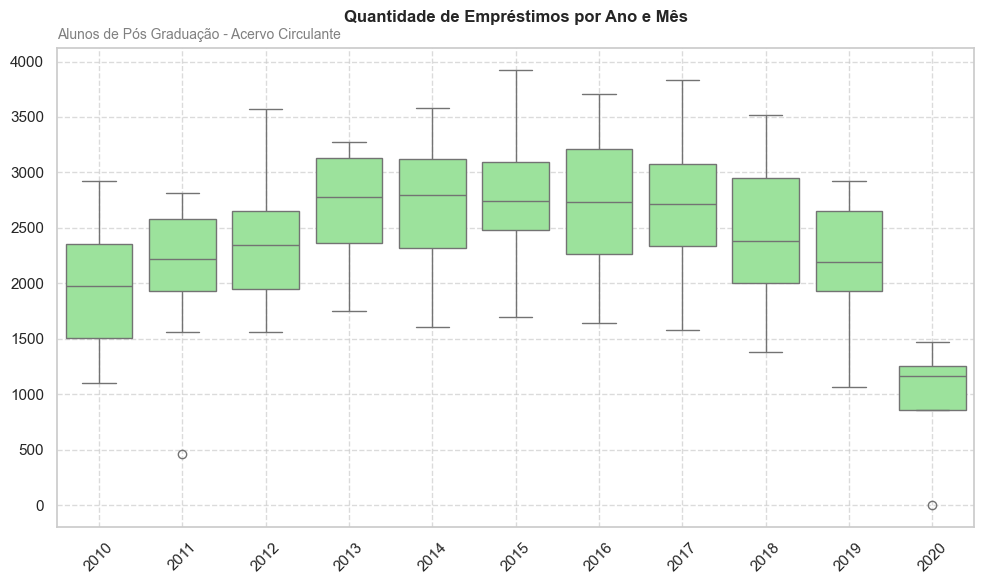

In [192]:
criar_boxplot(alunos_pos_graduacao_acervo_circulante, 'ano', 'quantidade', 'Quantidade de Empréstimos por Ano e Mês', 'Alunos de Pós Graduação - Acervo Circulante')

Com os alunos de pós graduação, a queda de emprestimos só começou a ocorrer à partir de 2018.

De 2010 até 2013 teve um aumento quase que constante.